In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import axes3d
import pandas as pd
import numpy as np
import os


def cc(arg):
    return colorConverter.to_rgba(arg,alpha = 0.6)

In [10]:
path_dir = os.getcwd()+'/overlapjob/'
file_list = os.listdir(path_dir)
file_list.sort()
file_list.reverse()
print(file_list)

['overlap_3D.png', 'MET_eachjob_eachjob.png', 'MET_eachjob.csv', 'HEFT_eachjob_eachjob.png', 'HEFT_eachjob.csv', 'DRM_eachjob_eachjob.png', 'DRM_eachjob.csv', '.DS_Store']


In [19]:
csv_files = []
for csv_file in file_list:
    if '.csv' in csv_file:
        csv_files.append(csv_file)
print(csv_files)

['MET_eachjob.csv', 'HEFT_eachjob.csv', 'DRM_eachjob.csv']


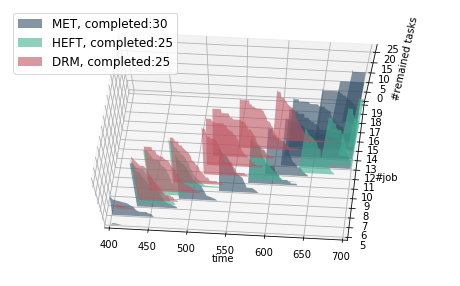

In [23]:
def cc(arg):
    return colorConverter.to_rgba(arg, alpha=0.6)

verts=[]
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
facecolors = [cc((50/255,78/255,102/255,0)), cc((65/255,177/255,147/255,0)), cc((190/255,86/255,97/255,0))]
# facecolors = [cc('r'), cc('g'), cc('b')]

for t, filename in enumerate(csv_files):
    verts.append([])
    df = pd.read_csv(path_dir+'/'+filename)
    df = df.drop(df.columns[0],axis = 1)

    for i in range(int(len(df.columns)/2)):
        df = df.drop('n'+str(i),axis = 1)
        
    for i, count in enumerate(df.isna().sum()):
        if len(df['time']) == count:
            df = df.drop(str(i-1), axis = 1)
    df = df[len(df['time']) - len(df[df['time'].values > 400]):len(df['time']) - len(df[df['time'].values > 700])]
    df = df.fillna(0)
#     xs = np.arange(df['time'].values[0],df['time'][len(df)-1],1)
    xs = np.arange(df.iloc[0][0],df.iloc[-1][0],1)
    x = df['time'].values
    
    zs = np.arange(len(df.columns)-1)
    for z in zs:
        ys = df[str(z)].values
        ys[0], ys[-1] = 0,0
        verts[t].append(list(zip(x,ys)))
#     poly = PolyCollection(verts[t], facecolors=[cc(cm.jet(0.16*t,1))], label=filename[:-12]+', completed:'+str(i))
        poly = PolyCollection(verts[t], facecolors=facecolors[t], label=filename[:-12]+', completed:'+str(i))
#     poly = PolyCollection(verts[t], facecolors=[cc([0.5,0.15*z,0,0])], label='parametric curve')
    poly.set_alpha(0.6)
    ax.add_collection3d(poly, zs=zs+t/3, zdir = 'y')
    poly._facecolors2d=poly._facecolors3d
    poly._edgecolors2d=poly._edgecolors3d
    
ax.legend(fontsize=12, loc='upper left')
ax.set_xlabel('time')
ax.set_xlim3d(400,700)
ax.set_ylabel('#job')
ax.set_ylim3d(5,18)
ax.set_zlabel('#remained tasks')
ax.set_zlim3d(0,28)
ax.view_init(70, 275)

start, end = ax.get_xlim3d()
plt.yticks(np.arange(5, 20, 1.0))

fig.savefig(path_dir+'overlap_3D.png')
plt.show()


In [51]:




    


# facecolors = []
# for i in range(len(zs)):
#     facecolors.append
poly = PolyCollection(verts[2], facecolors=['b'])
poly.set_alpha(0.7)

ax.add_collection3d(poly, zs=zs, zdir = 'y')
ax.set_xlabel('time')
ax.set_xlim3d(0,len(xs))
ax.set_ylabel('#job')
ax.set_ylim3d(0,len(zs))
ax.set_zlabel('#remained tasks')
ax.set_zlim3d(0,28)
plt.show()
